# Analysis de distribución de votos en Elecciones Bolivianas 2019

Este breve analisis fue realizado en la semana siguiente de las elecciones bolivianas sobre datos bajados de https://trep.oep.org.bo y https://computo.oep.org.bo intentando entender quienes decian que el TREP habia sido adulterado y que esa fue la razón de la pausa de publicaciones y de la renuncia de costas.

El analysis no es en nada exaustivo pero demuestra con claridad que el TREP estaba mas a favor del MAS que el computo oficial y que por ende interrumpir la publicación benefició mas a CC que al MAS.

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')

In [ ]:
%config IPCompleter.greedy=True

Primero extraemos el resumen de actas, fue generado con actas.py que esta en en este mismo repositorio. actas.py nos calcula la distribucion de votos por cada xlsx. es un proceso bastante lento porque requiere abrir y descomprimir una gran cantidad de archivos y por eso lo processe a parte. cualquiera puede clonar este repo y verificar la generacion.

In [178]:
from datetime import datetime

data = pd.read_csv("./xlsx/actas-resumen.csv")
# datetime.strptime(date_str, '%a %B %d %H:%M:%S +0800 %Y')
origin = data['file'].apply(lambda x: x.split('/')[1])
date = data['file'].apply(
    lambda x: 
    datetime.strptime(x.split('/')[2].replace('acta.', '').replace('.xlsx', ''), 
    '%Y.%m.%d.%H.%M.%S'))
date = pd.DatetimeIndex(date)
data.insert(0, 'date', date)
data.insert(1, 'origin', origin)

data.set_index('date')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
date       111 non-null datetime64[ns]
origin     111 non-null object
file       111 non-null object
%_total    111 non-null float64
%_cc       111 non-null float64
%_mas      111 non-null float64
%_diff     111 non-null float64
total      111 non-null int64
cc         111 non-null int64
mas        111 non-null int64
diff       111 non-null int64
delta      111 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 10.5+ KB


vi un reporte que decia que cuando se estaban igualaadno los votos se ve una acceleracion innatural de los votos del MAS.

grafiquemos entonces en el computo official el momento en que se crucen los votos de las dos fuerzas politicas

se puede ver en todo caso que en el momento que se igualan CC repica

<Figure size 432x288 with 0 Axes>

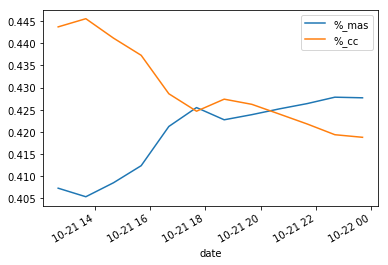

In [205]:
fig = plt.figure()
computo = data[data['origin'] == 'computo']
trep = data[data['origin'] == 'trep']
mask = (computo['date'] > '2019-10-21 12:00') & (computo['date'] < '2019-10-22')
c = computo.loc[mask]
c.plot(x='date', y=['%_mas', '%_cc'])

Otro reporte alegaba que entre el 84 y el 95% del trep (los dos puntos de datos principales) hubo una adulteracion masiva de votos para que gane el MAS, decidi graficar las evoluciones del TREP y del computo oficial para ver como se comparaban y como venian las tendencias de aumento.

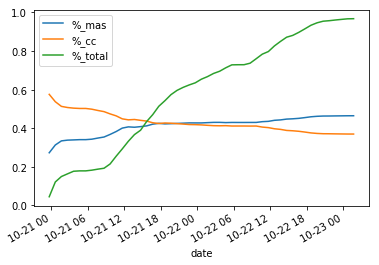

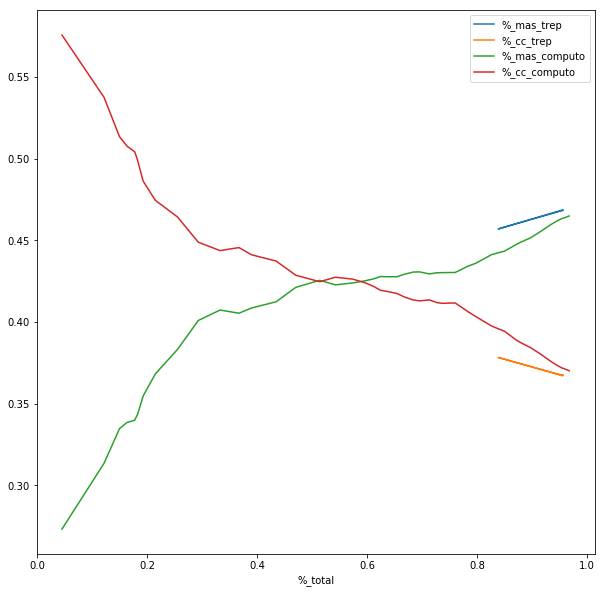

In [192]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


computo.plot(x='date', y=['%_mas', '%_cc', '%_total'])

b = pd.merge(trep, computo, on='%_total', how='outer', suffixes=('_trep', '_computo'))
b.set_index('%_total')
#mask = (b['%_total' > 0.8])
#f = b.loc(mask)

b.plot(
    figsize=(10,10),
    x='%_total', 
    y=['%_mas_trep', '%_cc_trep', '%_mas_computo', '%_cc_computo'])


In [104]:
trep

,date,origin,file,%_total,%_cc,%_mas,%_diff,total,cc,mas,diff,delta
0,2019-10-25 00:10:40,trep,./trep/acta.2019.10.25.00.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
1,2019-10-24 00:10:40,trep,./trep/acta.2019.10.24.00.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
2,2019-10-24 01:10:40,trep,./trep/acta.2019.10.24.01.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
3,2019-10-24 03:10:40,trep,./trep/acta.2019.10.24.03.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
4,2019-10-24 02:10:40,trep,./trep/acta.2019.10.24.02.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
5,2019-10-23 03:10:40,trep,./trep/acta.2019.10.23.03.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
6,2019-10-24 04:10:40,trep,./trep/acta.2019.10.24.04.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
7,2019-10-23 04:10:40,trep,./trep/acta.2019.10.23.04.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
8,2019-10-24 06:10:40,trep,./trep/acta.2019.10.24.06.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6
9,2019-10-23 05:10:40,trep,./trep/acta.2019.10.23.05.10.40.xlsx,0.956273,0.36724,0.468354,0.101114,33044,2162311,2757673,595362,6561.6


In [193]:
actas = pd.read_excel("/home/xaiki/Downloads/acta.2019.10.25.06.26.34.xlsx")

In [197]:
actas

,País,Número departamento,Departamento,Provincia,Número municipio,Municipio,Circunscripción,Localidad,Recinto,Número Mesa,...,UCS,MAS - IPSP,21F,PDC,MNR,PAN-BOL,Votos Válidos,Blancos,Nulos,Estado acta
0,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1455,...,0,118,0,3,1,2,126,1,1,Computada
1,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1456,...,0,110,0,5,1,1,125,1,6,Computada
2,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1457,...,1,120,2,3,0,0,131,1,5,Computada
3,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1458,...,1,124,0,2,0,2,139,2,2,Computada
4,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1459,...,0,122,0,6,0,0,136,1,2,Computada
5,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1460,...,0,122,0,2,0,1,133,0,5,Computada
6,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1461,...,1,121,1,4,1,1,138,1,4,Computada
7,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1462,...,0,106,1,3,0,0,111,1,9,Computada
8,Argentina,10,Buenos Aires,Quilmes,1,Quilmes,NaN,Ezpeleta,Esc Primaria Nro 52 Gral. Bartolome Mitre.,1463,...,0,33,0,0,0,1,40,0,0,Computada
9,Argentina,10,Buenos Aires,La Plata,1,La Plata,NaN,La Plata,Escuela Secundaria Nº34 Almafuerte,1464,...,2,114,3,6,0,1,129,4,1,Computada


In [198]:
actas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68132 entries, 0 to 68131
Data columns (total 26 columns):
País                   68132 non-null object
Número departamento    68132 non-null int64
Departamento           68132 non-null object
Provincia              68132 non-null object
Número municipio       68132 non-null int64
Municipio              68132 non-null object
Circunscripción        33581 non-null object
Localidad              68132 non-null object
Recinto                68132 non-null object
Número Mesa            68132 non-null int64
Código Mesa            68132 non-null int64
Elección               68132 non-null object
Inscritos              68132 non-null int64
CC                     68132 non-null int64
FPV                    68132 non-null int64
MTS                    68132 non-null int64
UCS                    68132 non-null int64
MAS - IPSP             68132 non-null int64
21F                    68132 non-null int64
PDC                    68132 non-null int64
MNR

In [204]:
actas.loc[actas['Número Mesa'] == 76963]

,País,Número departamento,Departamento,Provincia,Número municipio,Municipio,Circunscripción,Localidad,Recinto,Número Mesa,...,UCS,MAS - IPSP,21F,PDC,MNR,PAN-BOL,Votos Válidos,Blancos,Nulos,Estado acta
63351,Bolivia,7,Santa Cruz,Cordillera,3,Cabezas,NaN,Abapó,Esc. Pto. Camacho,76963,...,0,76,36,16,4,2,196,6,9,Computada
63352,Bolivia,7,Santa Cruz,Cordillera,3,Cabezas,Circunscripción Uninominal 55,Abapó,Esc. Pto. Camacho,76963,...,1,41,56,9,0,0,141,66,4,Computada
